# Stat 305 Lab 3 + HW3, Part II: Joint distributions

**For the lab/part II of the HW, you must work in teams of 2, submitting one notebook per team.**  (Your partner for the lab/part II does not have to be the same partner for the written part of the HW.)

**TYPE YOUR NAMES HERE**

## Introduction

This Jupyter notebook provides a template for you to fill in. **Read the notebook from start to finish, completing the parts as indicated.**  To run a cell, make sure the cell is highlighted by clicking on it, then press SHIFT + ENTER on your keyboard.  (Alternatively, you can click the "play" button in the toolbar above.)

Some code has already been provided.  Be sure to run this code and view the output to understand what it does.  In other parts, you will need to provide the code yourself; use the examples provided as a guide. 

You will use the Python package [Symbulate](https://github.com/dlsun/symbulate).   **You should use only use Symbulate commands, not general Python code.**

**Thought questions:** You should think about and discuss briefly with your partner before proceeding, but you do not need to type a response.

Be sure to run the following lines first.

In [1]:

!pip install symbulate

  Created wheel for symbulate: filename=symbulate-0.5.5-cp36-none-any.whl size=38855 sha256=4dd722b252f7453f5d06f751080a2aa8a55f9d646345d6b10b770eb4ec285729
  Stored in directory: /root/.cache/pip/wheels/37/a7/3e/4a01247a8597099e4e36c020ebdf0d036713bbfd676a65bf01
Successfully built symbulate


In [0]:
from symbulate import *
%matplotlib inline

# Lab 3

In this lab you will:

- Define and simulate values of random variables
- Display simulated values in plots to visualize distributions, in particular, **joint distributions**
- Take a closer look at covariance and correlation, numbers which measure the association between two random variables
- Investigate transformations of random variables, and standardization

Hints about thinking about/sketching distributions:

1. Figure out an appropriate type of plot to sketch (Is the variable discrete or continuous?  One variable or two? Joint or marginal distribution?)
1. Consider just one possible example value.  Or a few possible values.  Remember to consider *pairs* of values for a joint distribution.
1. Determine all possible values and label the plot axes. Remember to consider possible *pairs* of values for a joint distribution.
1. Then start to think about which values will be more/less likely than others.  This step is the hardest, but just doing the first three steps gets you a long way toward the answer.

## a) Variance of a linear rescaling

Consider a random variable $X$ that has the distribution displayed in plot E in Exercise 8.3 of Handout 8.  (In the context of the example, $X$ represents the quiz score of a randomly selected student.) The pmf is

| $x$      	|   3 	|   4 	|   5 	|   6 	|   7 	|
|----------	|----:	|----:	|----:	|----:	|----:	|
| $p_X(x)$ 	| 1/9 	| 2/9 	| 3/9 	| 2/9 	| 1/9 	|

Define a `RV` $X$ with this distribution.  (Hint: use [`BoxModel` with `probs`](https://dlsun.github.io/symbulate/probspace.html#boxmodel).)

In [0]:
X=RV(BoxModel([3, 4, 5,6,7], probs=[1/9, 2/9, 3/9, 2/9, 1/9] ))


Simulate many values of $X$, store the results, and summarize the simulated values in a plot and a table.

3,103
4,209
5,339
6,252
7,97
Total,1000


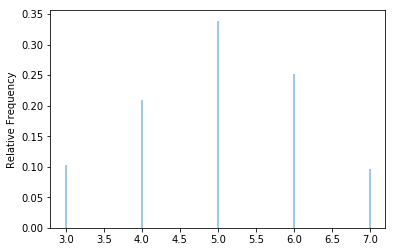

In [7]:
x=X.sim(1000)
x.plot()
x.tabulate()


Approximate $Var(X)$ and $SD(X)$.

In [8]:
x.var(), x.sd()

(1.260039, 1.1225145878784828)

Now repeat the above for  $Y = X+5$.  (In the context of the example, $Y$ represents the quiz score after all scores have been curved by adding 5 points.)

**Thought question:** What do you think will change? How?

(1.4219589999999998, 1.192459223621504)

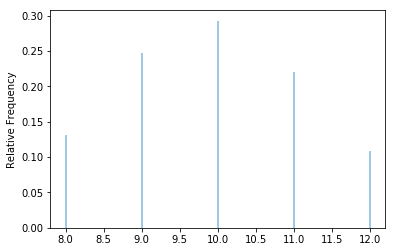

In [9]:
Y = X+5
y=Y.sim(1000)

y.plot()
y.tabulate()
y.var(), y.sd()

Now repeat the above for  $Z = 2X$.  (In the context of the example, $X$ represents the quiz score after all scores have been doubled.)

**Thought question:** What do you think will change?

(5.135599999999999, 2.2661862235924035)

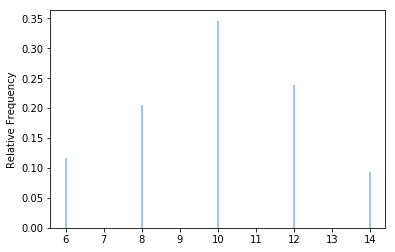

In [10]:
Z =  2*X
z=Z.sim(1000)

z.plot()
z.tabulate()
z.var(), z.sd()

**Thought questions:**

- What affect does adding a constant, as in $X+5$, have on variance/SD?  Why?
- What affect does multiplying by a constant, as in $2X$, have on variance/SD? Why?

## b) Joint distribution of two discrete RVs

Consider the probability space corresponding to two rolls of a fair four-sided die.  Let $X$ be the sum of the two rolls, and let $Y$ be the number of rolls that are equal to 4.  For example, if the outcome of the rolls is $\omega=(3, 2)$ then $X(\omega)=5$ and $Y(\omega)=0$.

Define an appropriate probability space and random variables. (Hint: use `count_eq()` to define $Y$.)

In [0]:
P= BoxModel([1,2,3,4], 2)
Y = RV(P, count_eq(4))
X=RV(P, sum)

Simulate many $(X, Y)$ pairs, store the results, and summarize the simulated values in a plot and a table.  Note: the default plot is a scatterplot, but `.plot('tile')` gives a better picture of relative frequencies.

"(2, 0)",1204
"(3, 0)",2439
"(4, 0)",3509
"(5, 0)",2417
"(5, 1)",2370
"(6, 0)",1143
"(6, 1)",2318
"(7, 1)",2369
"(8, 2)",1231
Total,19000


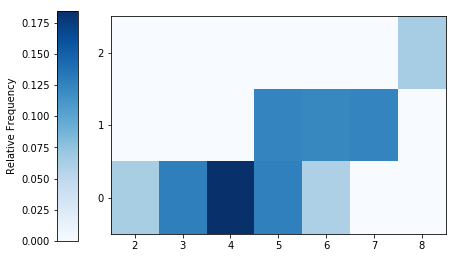

In [13]:
xy=(X&Y).sim(19000)
xy.plot('tile')
xy.tabulate()

**Thought question:** How could you determine the marginal distributions of $X$ and $Y$ from the joint distribution? What would plots of these marginal distributions look like? 

Create a plot displaying both joint and marginal distributions.  Hint: `.plot(['tile', 'marginal'])`

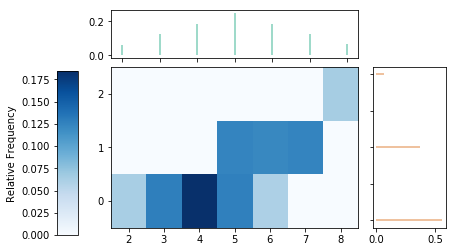

In [14]:
xy.plot(['tile', 'marginal'])

Create a plot displaying both joint and marginal distributions.  Hint: `.plot(['tile', 'marginal'])`

Approximate $Cov(X, Y)$ and $Corr(X, Y)$.

In [15]:
xy.cov(), xy.corr()

(0.7629266842105275, 0.778148648390594)

**Thought question:** Why is the correlation positive?

Let $Z$ be the number of rolls that are equal to 1.

**Thought question:** Will $Corr(X, Z)$ be positive, negative, or zero? Why?

Repeat for $(X, Z)$ what you did for $(X, Y)$.

(-0.742810537396122, -0.7708981526909553)

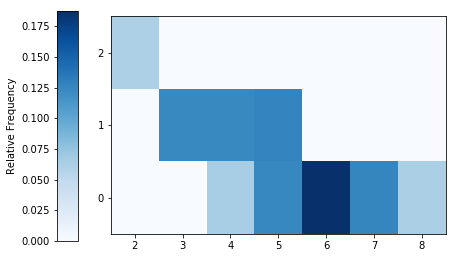

In [16]:
Z = RV(P, count_eq(1))
xz = (X&Z).sim(19000)
xz.plot('tile')
xz.cov(), xz.corr()


**Thought question:** Will $Corr(Y, Z)$ be positive, negative, or zero? Why?

Repeat for $(Y, Z)$ what you did for $(X, Y)$.

(-0.12282000000000007, -0.3285692196715841)

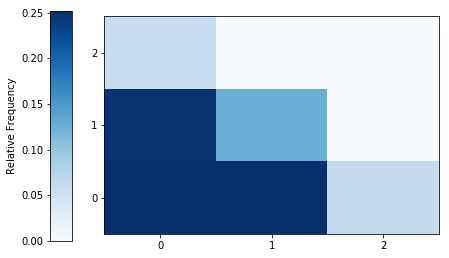

In [17]:
yz = (Y&Z).sim(19000)
yz.plot('tile')
yz.cov(), yz.corr()

Let $W=Y+Z$\.

**Thought question:** Will $Corr(X, W)$ be positive, negative, or zero? Why?

Repeat for $(X, W)$ what you did for $(X, Y)$.

(-0.005297185595567698, -0.004696590409716922)

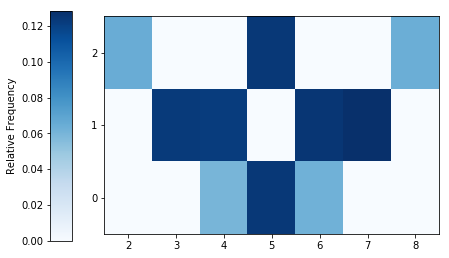

In [18]:
W = Y + Z
xw = (X&W).sim(19000)
xw.plot('tile')
xw.cov(), xw.corr()

**Thought questions:**

- Can you explain why the plots look like they do?
- Can you explain why the covariance/correlation is positive/negative/zero?

## c) Joint distribution of two continuous RVs

Spin the Uniform(0, 1) spinner twice and let $X$ be the sum of the two spins and $Y$ the larger of the two spins.

**Thought question:** Sketch a plot representing the joint distribution of $X$ and $Y$.  Will the covariance/correlation be positive, negative, or zero?

Define an appropriate probability space and RVs.  (Hint: remember `** 2` for "spin twice".)

In [0]:
P = Uniform(0,1)**2
X = RV(P,sum)
Y = RV(P,max)

Simulate many $(X, Y)$ pairs, store the results, and summarize the simulated values in a plot.  Note: the default plot is scatterplot, but that doesn't give a great sense of relative frequency.  You can get a two-dimensional histogram with `.plot('hist')`, which works but produces an error message.  You can also try `plot('density')` for a smoother density plot than a histogram, but this sometimes takes a minute to run.

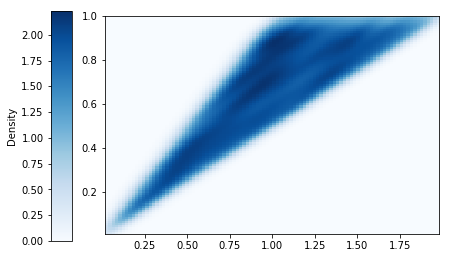

In [20]:
xy = (X&Y).sim(10000)
xy.plot('density')

**Thought question:** How could you determine the marginal distributions of $X$ and $Y$ from the joint distribution? What would plots of these marginal distributions look like? 

Create a plot displaying both joint and marginal distributions.  Hint: add `'marginal'` to whatever plot you created above, e.g., `.plot(['scatter', 'marginal'])` or `.plot(['hist', 'marginal'])`

ValueError: ignored

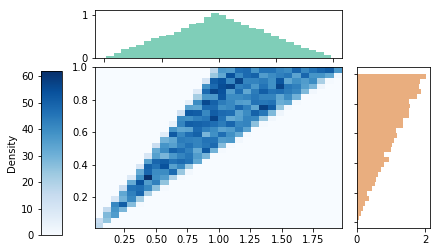

In [21]:
xy.plot(['hist','marginal'])

Approximate $Cov(X, Y)$ and $Corr(X, Y)$.

In [22]:
xy.cov(),xy.corr()

(0.0826632576996796, 0.8641529597278933)

**Thought questions:**
    
- Can you explain why the plots look the way they do?
- Can you suggest an expression for the joint pdf? Would you say that the joint distribution is uniform over the range of possible values?
- Can you suggest expressions for the marginal pdfs?
- Can you explain the value of correlation?

## d) Two more continuous RVs

Spin the Uniform(0, 1) spinner twice and let $U_1$ be the result of the first spin and $U_2$ the result of the second.  Define $X=-\log(U_1)$ and $Y=(2U_2-1)X$.

**Thought question:** Sketch a plot representing the joint distribution of $X$ and $Y$.  Will the covariance/correlation be positive, negative, or zero?

Define an appropriate probability space and RVs.  (Hint: remember `** 2` for "spin twice".)

In [0]:
P = Uniform(0,1)**2
U1,U2 = RV(P)
X = -log(U1)
Y = (2*U2-1)*X


Simulate many $(X, Y)$ pairs, store the results, and summarize the simulated values in a plot.  Note: you should definitely try a scatterplot first for this one, because the scale of values in this particular problem obscures the histogram and density plots.  So try scatter first, and then you can try other plots.

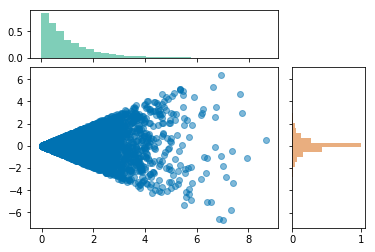

In [24]:
xy = (X&Y).sim(10000)
xy.plot(['scatter','marginal'])


**Thought question:** How could you determine the marginal distributions of $X$ and $Y$ from the joint distribution? What would plots of these marginal distributions look like? 

Create a plot displaying both joint and marginal distributions.  Hint: add `'marginal'` to whatever plot you created above, e.g., `.plot(['scatter', 'marginal'])` or `.plot(['hist', 'marginal'])`

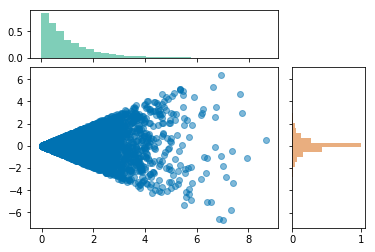

In [25]:
xy.plot(['scatter','marginal'])

Approximate $Cov(X, Y)$ and $Corr(X, Y)$.

In [26]:
xy.cov(), xy.corr()

(0.027444714625579434, 0.033874281994361856)

**Thought questions:**
    
- Can you explain why the plots look the way they do?
- Can you suggest an expression for the joint pdf? Would you say that the joint distribution is uniform over the range of possible values?
- Can you suggest expressions for the marginal pdfs?
- Can you explain the value of correlation?

**Thought question:** Recall that $Y=(2U_2-1)X$.  Define $Z=(2U_1-1)X$.  Would $Y$ and $Z$ have the same marginal distribution?  Would the joint distribution of $(X, Y)$ be the same as the joint distribution of $(X, Z)$?

## e) Standardization (Mostly just read and run)


Assume that SAT Math ($X$) and Reading ($Y$) scores follow a Bivariate Normal distribution with mean 500 for each score, SD 100 for each score, and a correlation of 0.8.

In [0]:
P = BivariateNormal(mean1 = 500, sd1 = 100, mean2 = 500, sd2 = 100, corr = 0.8)
X, Y = RV(P)

Simulate many $(X, Y)$ pairs, summarize in a plot, and use the simulated results to estimate $\text{Cov}(X, Y)$.

ValueError: ignored

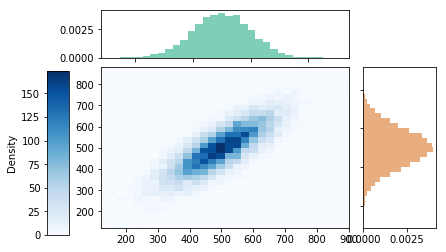

In [28]:
xy = (X & Y).sim(10000)
xy.plot(['hist', 'marginal'])

In [29]:
xy.cov(), xy.corr()

(7862.680656177026, 0.7981955819845669)

`xy` stores (x, y) pairs.  The following just picks off the x values and y values separately.

In [0]:
x = xy[0]
y = xy[1]

We can compute $SD(X), SD(Y)$ and see that $Corr(X, Y) = \frac{Cov(X, Y)}{SD(X)SD(Y)}$.

In [31]:
x.sd(), y.sd()

(99.22116307212328, 99.27891082338215)

In [32]:
xy.cov() / (x.sd() * y.sd())

0.798195581984567

A standardized RV is defined as $\frac{X-E(X)}{SD(X)}$.

**Thought questions:** Will standardizing a RV change the *shape* of its distribution?  What will the expected value and SD of a standardized RV be?

A standardized RV has expected 0 and standard deviation 1.

(-3.2720492981752614e-16, 1.0)

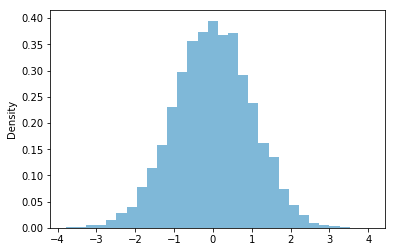

In [33]:
zx = (x - x.mean()) / x.sd()
zx.plot()
zx.mean(), zx.sd()

(3.399946990612079e-16, 1.0)

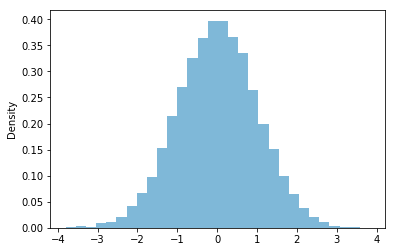

In [34]:
zy = (y - y.mean()) / y.sd()
zy.plot()
zy.mean(), zy.sd()

Correlation is the covariance between the standardized versions of the RVs.

$$
Corr(X, Y) = Cov\left(\frac{X-E(X)}{SD(X)}, \frac{Y-E(Y)}{SD(Y)}\right)
$$

In [35]:
(zx * zy).mean() - (zx.mean() * zy.mean())

0.798195581984567

You can also use `.standardize`.

ValueError: ignored

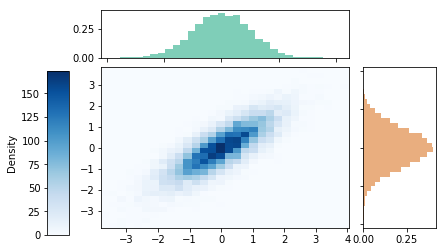

In [36]:
xy.standardize().plot(['hist', 'marginal'])

In [0]:
xy.standardize().cov(), xy.corr()

(0.80137396334194, 0.8013739633419372)

# HW3, Part II

# f)

Spin the Uniform(0, 1) spinner twice and let $U_1$ be the result of the first spin and $U_2$ the result of the second.  Define $X=-\log(U_1)$ and $Y=X + U_2$.

- Sketch a plot of the joint distribution of $X$ and $Y$ and determine if the covariance will be positive, negative, or zero.
- Sketch the marginal distributions.
- Perform an appropriate simulation analysis.
- Explain why the plots look the way they do, and the sign of the covariance.

In [0]:
# Enter your Symbulate code here

**TYPE YOUR RESPONSE HERE.**

# g)learned to use x = xy[0] and y = xy[1] to randomly select a stored pair.
#  )learned that a standardized random variable is centered at zero with a sd of 1
#  )also that correlation of random vars is the covariance between their standardized versions 
#  )learned about .standardize

Reflection: Write a paragraph, or some bullet points, of what you learned from this lab

**TYPE YOUR RESPONSE HERE.**

# h)are there other uses for .standarize aside from correlation

Reflection: Write a paragraph, or some bullet points, of some questions you have about the material introduced in this lab.

**TYPE YOUR RESPONSE HERE.**

## Submission Instructions

- After you have completed the notebook, in Jupyter select **Kernel > Restart kernel and run all** cells.  In JupyterLab, select **Kernel > Restart kernel** then **Run > Run all cells.**
- After the notebook finishes rerunning check to make sure that you have no errors and everything runs properly.  Fix any problems and redo this step until it works.
- **NOTE: If you included any 2d histograms, the error message is going to make the notebook stop running.  You'll have to go back and manually run the remaining cells.**
- Make sure you typed the names of both partners at the top of the notebook where it says "Type your names here".
- Save both a notebook and a HTML version.  In 
  - Notebook: JupyterLab: right click on the file name and choose download. Jupyter: File > Download as > Notebook.  
  - HTML: JupyterLab: select File > Export to > HTML. Jupyter: File > Download as > HTML.
- Submit your files in PL.  Remember, only one submission per team.  (Either partner can submit.)